In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor




In [ ]:
torch.__version__


'2.0.0+cu118'

##setup training data


```
```



In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform= ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17510245.30it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299001.23it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5582023.33it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10066329.60it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape


torch.Size([1, 28, 28])

In [ ]:
len(train_data.targets)

60000

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

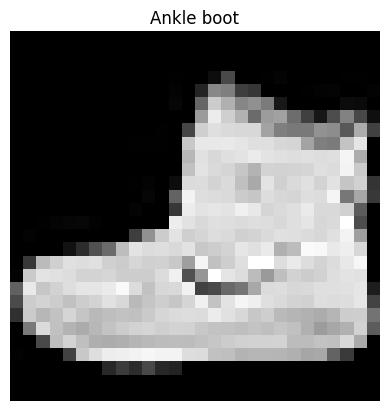

In [ ]:
image,label=train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap='gray')
plt.axis('off')
plt.title(class_names[label])

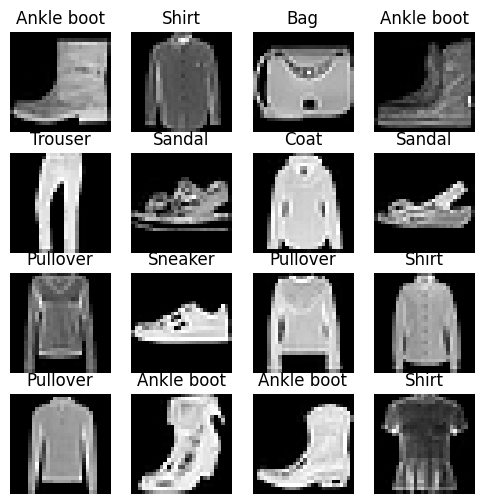

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=[6,6])
rows,cols = 4,4
for i in range(1, rows*cols + 1):
   random_index = torch.randint(0,len(train_data),size=[1]).item()
   image, label = train_data[random_index]
   fig.add_subplot(rows, cols, i)
   plt.imshow(image.squeeze(), cmap="gray")
   plt.title(class_names[label])
   plt.axis(False);


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

#for training data
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

#for testing data

test_dataloader = DataLoader(test_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

print(f"dataloader = {train_dataloader,test_dataloader}")
print(f"length of train_dataloader = {len(train_dataloader)} of Batches{BATCH_SIZE}")
print(f"length of test_dataloader = {len(test_dataloader)} of Batches{BATCH_SIZE}")





dataloader = (<torch.utils.data.dataloader.DataLoader object at 0x7fb1a6624ca0>, <torch.utils.data.dataloader.DataLoader object at 0x7fb1a6624670>)
length of train_dataloader = 1875 of Batches32
length of test_dataloader = 313 of Batches32


In [ ]:
# checking what data is in our batches 

train_feature_batch ,train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape,train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(torch.Size([1, 28, 28]), torch.Size([]))

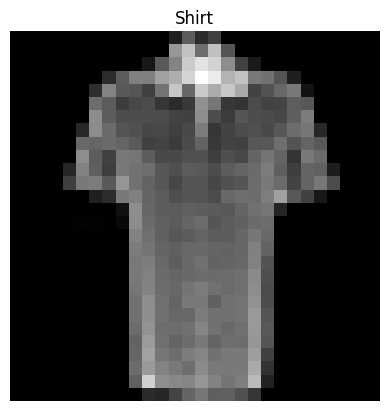

In [ ]:
torch.manual_seed(42)
random_index = torch.randint(0,len(train_feature_batch),size=[1]).item()
image, label = train_feature_batch[random_index], train_labels_batch[random_index]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);
image.shape,label.shape

In [ ]:
# flatten layer introduced
#compressing the tensors into single vector

flatten_layer = nn.Flatten()
x = train_feature_batch[0]
output = flatten_layer(x)
x.shape, output.shape


(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
# baseline 0 model preperation

from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
#creating an instance of our model

model_0 = FashionMNISTModelV0(input_shape=28*28, 
                              hidden_units=10,
                              output_shape=len(class_names)).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#copying from availabe functions in github

import requests
from pathlib import Path 

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
#Now, importing accuracy metric from our helpers.py file

from helper_functions import accuracy_fn

#loss metrices and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



In [ ]:
## creating a function to track time in our model training , how much it takes

from timeit import default_timer as timer
def print_difference(start:float,
                     end:float,
                     device:torch.device=None):
  total_time = end - start
  return total_time


In [ ]:
## Setting up an progressbar first
from tqdm.auto import tqdm

#starting time in our cpu with setting the seeder
torch.manual_seed(42)
train_time_start_cpu = timer()

 #Setting the number of epochs we want
epochs = 4

 #creating a training loop for our model 

#looping the epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}......")

  #looping the batches now 
  train_loss = 0

  for batch,(X,y) in enumerate(train_dataloader): #enumerate tracks of which batch u r on during the iteration

    model_0.train()

    #forward pass
    y_pred = model_0(X)

    #calculate the loss (we r talking about the loss in the batch)
    loss= loss_fn(y_pred,y)
    train_loss += loss

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #Optimizer step
    optimizer.step()

    if batch % 400 ==0:
      print(f"looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples")

  # average loss total datasets
  train_loss /= len(test_dataloader)


  ########### Testing data training############

  test_loss,test_accuracy = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      # forward pass
      test_pred = model_0(X_test)

      # loss calculation
      test_loss += loss_fn(test_pred, y_test)

      #accuracy calculation
      # takes two arguments y_true and y_pred to calculate labels prediction of our model with the original label of our dataset
      test_accuracy += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #average testloss and accuracy of our model
    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%\n")

 








  







  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0......
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 3.56332 | Test loss: 0.51704, Test acc: 81.83%

Epoch: 1......
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 2.85991 | Test loss: 0.53433, Test acc: 81.40%

Epoch: 2......
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 2.72875 | Test loss: 0.51684, Test acc: 82.89%

Epoch: 3......
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 2.66307 | Test loss: 0.47423, Test acc: 83.20%



AS we have trained our model, WE'll make predections


In [ ]:
def make_prediction(model:torch.nn.Module,
                    data: list,):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #sample preparation
      sample=torch.unsqueeze(sample,dim=0)
      #forward pass result
      pred_logit = model(sample)
      #predection of probability
      pred_prob = torch.softmax(pred_logit.squeeze(0),dim=0)
      pred_probs.append(pred_prob)
  return  torch.stack(pred_probs)      

In [ ]:
test_data


Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
  

In [ ]:
pred_prob= make_prediction(model=model_0,
                                  data = test_samples)
pred_prob[:2]

tensor([[1.3833e-08, 8.6107e-09, 4.4551e-09, 3.3512e-09, 1.8786e-09, 6.7434e-01,
         3.0483e-08, 1.7119e-03, 2.7518e-06, 3.2394e-01],
        [2.1614e-01, 1.7340e-02, 1.0117e-02, 6.2722e-01, 7.0323e-02, 3.7401e-08,
         5.8258e-02, 2.4312e-06, 5.9606e-04, 2.0022e-06]])

In [ ]:
#converting the softmax into agrmax labesl

pred_classes = pred_prob.argmax(dim=1)
pred_classes


tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]))

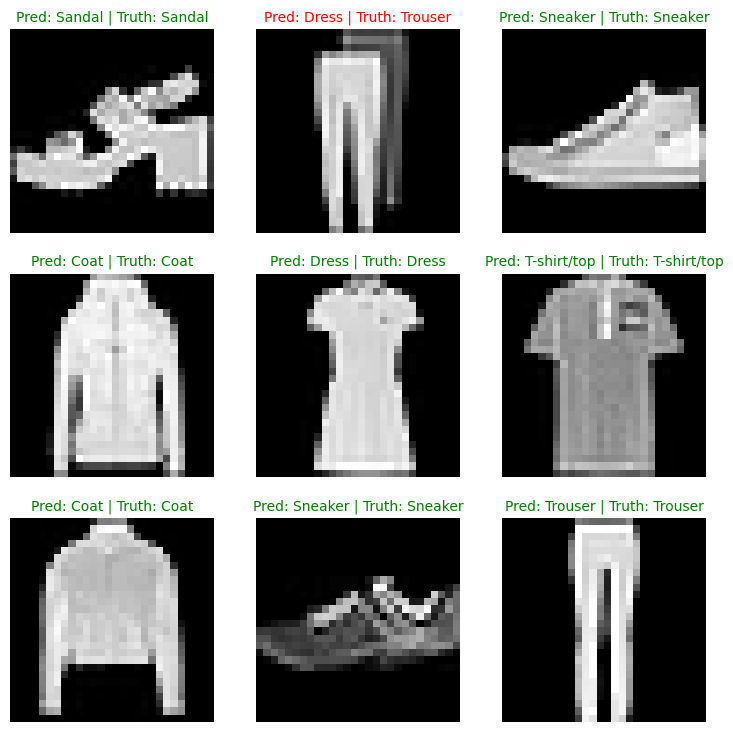

In [ ]:
# Plotting the  predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);